# Exploratory Data Analysis of the Disney Datasets

##### <b>Author :</b> Muntakim Rahman &nbsp; <b>UBC Student Number :</b> 71065221

# Foreword

This **Jupyter Notebook** will be showing some exploratory data analysis for the `Disney` dataset. We're going to be investigating `Disney`'s historical box office records to get an idea of what projects are/aren't profitable.

# Introduction

## Questions(s) of Interests

In this analysis, I will be investigating questions associated with the highest **Inflation Adjusted Gross** for the `Disney` dataset located [here](https://data.world/kgarrett/disney-character-success-00-16).

### What I Want to Learn

#### Highest Inflation Adjusted Grossing Films
*  Which top 5 actors had the highest inflation adjusted grossing films by decade?
*  Which top 5 directors had the highest inflation adjusted grossing films by decade?

*  Which top 5 actors had the overall highest inflation adjusted grossing films?
*  Which top 5 directors had the overall highest inflation adjusted grossing films?

#### Lowest Inflation Adjusted Grossing Films
*  Which top 5 actors had the lowest inflation adjusted grossing films by decade?
*  Which top 5 directors had the lowest inflation adjusted grossing films by decade?

*  Which top 5 actors had the overall lowest inflation adjusted grossing films?
*  Which top 5 directors had the overall lowest inflation adjusted grossing films?

#### Most Common Actor-Director Efforts
*  Which top 5 actors-directors worked together most frequently?
    * What was the average inflation adjusted gross of their movies?

## Dataset Description

The below description was taken from the website where the datasets were obtained.

"Disney characters, box office success & annual gross income"

### Summary

"What are the trends in the Walt Disney Studio’s box office data? How do certain characters contribute to the success or failure of a movie?"

# Tabulated Data

In [103]:
# Lets import all the required libraries needed for this analysis
import pandas as pd

import altair as alt
from vega_datasets import data

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import seaborn as sns

import datetime as dt

from merge_on_actor import merge_on_actor
from get_release_decade import get_release_decade
from get_totalgross_value import get_totalgross_value
from plot_histogram import plot_histogram

In [104]:
gross_df = pd.read_csv("data/disney_movies_total_gross.csv")
display(gross_df.head())

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [105]:
studio_df = pd.read_csv("data/disney_revenue_1991-2016.csv")
display(studio_df.head())

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


In [106]:
characters_df = pd.read_csv("data/disney-characters.csv")
display(characters_df.head())

,movie_title,release_date,hero,villian,song
0,\r\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,\r\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,\r\nFantasia,"November 13, 1940",NaN,Chernabog,NaN
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,\r\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [107]:
directors_df = pd.read_csv("data/disney-director.csv")
display(directors_df.head())

,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


In [108]:
voice_actors_df = pd.read_csv("data/disney-voice-actors.csv")
display(voice_actors_df.head())

,character,voice-actor,movie
0,Abby Mallard,Joan Cusack,Chicken Little
1,Abigail Gabble,Monica Evans,The Aristocats
2,Abis Mal,Jason Alexander,The Return of Jafar
3,Abu,Frank Welker,Aladdin
4,Achilles,None,The Hunchback of Notre Dame


## Clean Data

### Convert Dates to Type DateTime.Date 

We are primarily interested in release month and year to account for data inconsistencies.

In [109]:
gross_df['release_year'] = gross_df['release_date'].apply(lambda effective_date: dt.datetime.strptime(effective_date, '%b %d, %Y').date().year)
gross_df['release_month'] = gross_df['release_date'].apply(lambda effective_date: dt.datetime.strptime(effective_date, '%b %d, %Y').date().month)

In [110]:
characters_df['release_year'] = characters_df['release_date'].apply(lambda effective_date: dt.datetime.strptime(effective_date, '%B %d, %Y').date().year)
characters_df['release_month'] = characters_df['release_date'].apply(lambda effective_date: dt.datetime.strptime(effective_date, '%B %d, %Y').date().month)

In [111]:
## Let's look at the release month-year information for the movies to deal with data inconsistencies.

gross_df.drop(columns=['release_date'], inplace=True)
characters_df.drop(columns=['release_date'], inplace=True)

In [112]:
display(gross_df.head())

,movie_title,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year,release_month
0,Snow White and the Seven Dwarfs,Musical,G,"$184,925,485","$5,228,953,251",1937,12
1,Pinocchio,Adventure,G,"$84,300,000","$2,188,229,052",1940,2
2,Fantasia,Musical,G,"$83,320,000","$2,187,090,808",1940,11
3,Song of the South,Adventure,G,"$65,000,000","$1,078,510,579",1946,11
4,Cinderella,Drama,G,"$85,000,000","$920,608,730",1950,2


In [113]:
display(characters_df.head())

,movie_title,hero,villian,song,release_year,release_month
0,\r\nSnow White and the Seven Dwarfs,Snow White,Evil Queen,Some Day My Prince Will Come,1937,12
1,\r\nPinocchio,Pinocchio,Stromboli,When You Wish upon a Star,1940,2
2,\r\nFantasia,NaN,Chernabog,NaN,1940,11
3,Dumbo,Dumbo,Ringmaster,Baby Mine,1941,10
4,\r\nBambi,Bambi,Hunter,Love Is a Song,1942,8


### Complete DataFrame (With Merged Tables)

In [114]:
# Villain was mispelled as villain in the characters dataset. Let's fix that.
characters_df.rename(columns={'villian': 'villain'}, inplace=True)

In [115]:
characters_df['movie_title'] = characters_df['movie_title'].str.replace('\r\n', '')

## Lets merge the gross_df and characters_df.

char_revenue_df = pd.merge(
    gross_df, 
    characters_df, 
    on=['movie_title', 'release_year', 'release_month'], 
    how='outer'
)

display(char_revenue_df.head())

,movie_title,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year,release_month,hero,villain,song
0,Snow White and the Seven Dwarfs,Musical,G,"$184,925,485","$5,228,953,251",1937,12,Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,Adventure,G,"$84,300,000","$2,188,229,052",1940,2,Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,Musical,G,"$83,320,000","$2,187,090,808",1940,11,NaN,Chernabog,NaN
3,Song of the South,Adventure,G,"$65,000,000","$1,078,510,579",1946,11,NaN,NaN,NaN
4,Cinderella,Drama,G,"$85,000,000","$920,608,730",1950,2,Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo


In [116]:
## Lets merge the char_revenue_df and directors_df.
directors_df.rename(columns={'name' : 'movie_title'}, inplace=True)

film_revenue_df = pd.merge(
    char_revenue_df, 
    directors_df, 
    on='movie_title', 
    how='outer'
)

display(film_revenue_df.head())

,movie_title,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year,release_month,hero,villain,song,director
0,Snow White and the Seven Dwarfs,Musical,G,"$184,925,485","$5,228,953,251",1937,12,Snow White,Evil Queen,Some Day My Prince Will Come,David Hand
1,Pinocchio,Adventure,G,"$84,300,000","$2,188,229,052",1940,2,Pinocchio,Stromboli,When You Wish upon a Star,Ben Sharpsteen
2,Fantasia,Musical,G,"$83,320,000","$2,187,090,808",1940,11,NaN,Chernabog,NaN,full credits
3,Song of the South,Adventure,G,"$65,000,000","$1,078,510,579",1946,11,NaN,NaN,NaN,NaN
4,Cinderella,Drama,G,"$85,000,000","$920,608,730",1950,2,Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo,Wilfred Jackson


In [117]:
voice_actors_df.rename(columns={'movie' : 'movie_title'}, inplace=True)
voice_actors_df.sort_values(by=['movie_title']).reset_index(drop=True, inplace=True)

In [118]:
hero_actors_df = merge_on_actor(voice_actors_df, film_revenue_df, char_type = 'hero')

c:\My_Files\School\School_Work\Engineering_Bachelors\2022\KeyCapabilities_DataScience\prog-python-ds-students\release\final_project\merge_on_actor.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_chars_df.iloc[i][f"{char_type}-actor"] = actors


In [119]:
villain_actors_df = merge_on_actor(voice_actors_df, film_revenue_df, char_type = 'villain')

In [120]:
complete_cols = hero_actors_df.columns.to_list() + villain_actors_df.columns.to_list()
complete_cols = list(dict.fromkeys(complete_cols))

In [121]:
effective_cols = [col for col in complete_cols if col.find('actor') == -1]
complete_df = pd.merge(hero_actors_df, villain_actors_df, on=effective_cols, how='outer')
complete_df = complete_df.assign(release_decade = get_release_decade(complete_df['release_year']))

Get gross in numerical datatype (i.e. `float64`)

In [122]:
complete_df = complete_df.assign(total_gross = complete_df['total_gross'].apply(lambda x: get_totalgross_value(x)))
complete_df = complete_df.assign(inflation_adjusted_gross = complete_df['inflation_adjusted_gross'].apply(lambda x: get_totalgross_value(x)))

In [123]:
display(complete_cols)

['movie_title',
 'genre',
 'MPAA_rating',
 'total_gross',
 'inflation_adjusted_gross',
 'release_year',
 'release_month',
 'hero',
 'villain',
 'song',
 'director',
 'hero-actor',
 'villain-actor']

In [124]:
complete_cols = [
    'movie_title',
    'release_decade',
    'release_year',
    'release_month',
    'total_gross',
    'inflation_adjusted_gross',
    'director',
    'MPAA_rating', 'genre', 
    'hero-actor', 'hero',
    'villain-actor', 'villain',
    'song'
]

complete_df = complete_df[complete_cols]
display(complete_df.head())

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
3,Song of the South,1940,1946,11,65000000.0,1.078511e+09,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
4,Cinderella,1950,1950,2,85000000.0,9.206087e+08,Wilfred Jackson,G,Drama,Ilene Woods,Cinderella,Eleanor Audley; Susanne Blakeslee,Lady Tremaine,Bibbidi-Bobbidi-Boo


In [125]:
# Look for Repeated Movie Entries
display(complete_df[complete_df.duplicated(subset = ['movie_title', 'release_year', 'release_month'])])

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song


## Assess Feasibility of Analysis

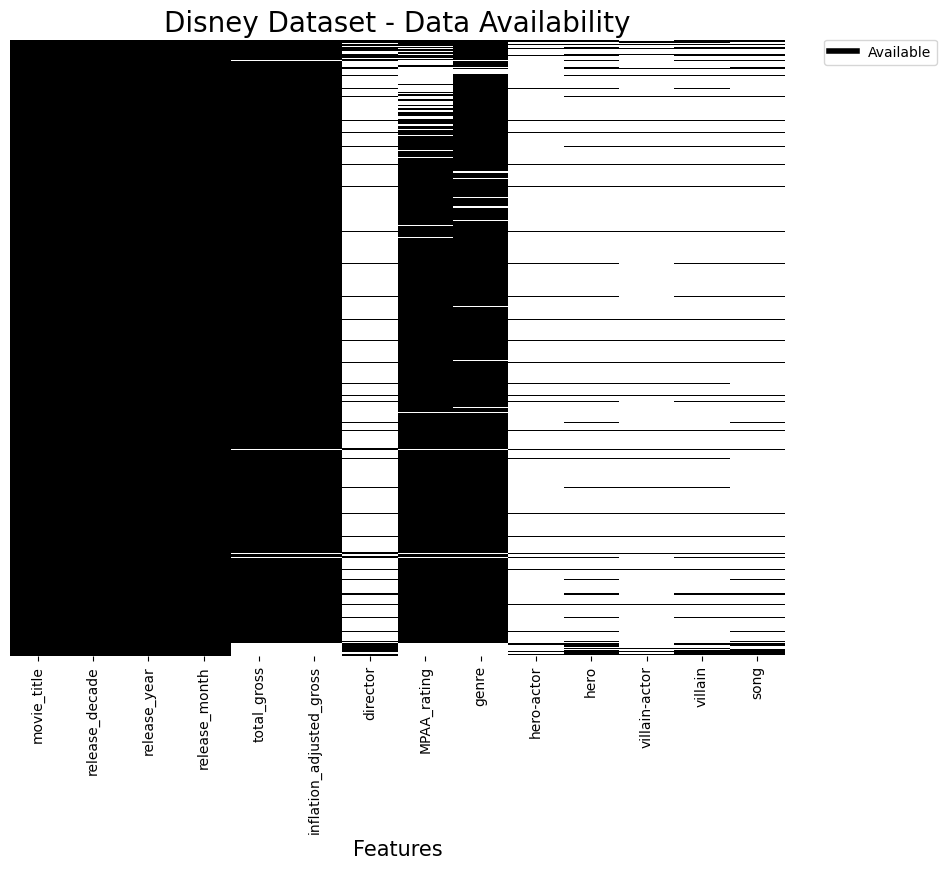

In [126]:
# Look at Data Sparsity in Complete DataFrame
plt.figure(figsize = (10, 8))

custom_lines = [Line2D([0], [0], color='black', lw=4)]

sparsity_plot = sns.heatmap(
    complete_df.notnull(), 
    cmap = 'binary', cbar = False,
    yticklabels = False
)

sparsity_plot.set_xlabel('Features', fontsize = 15)

sparsity_plot.set_title('Disney Dataset - Data Availability', fontsize = 20)

plt.legend(
    custom_lines, ['Available'], 
    fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.
)

plt.show()

That's pretty disappointing to see that we have such high data sparsity in the following columns :
* director
* hero-actor
* hero
* villain-actor
* villain
* song

# Highest (Inflation-Adjusted) Grossing Films

In [127]:
complete_df.sort_values(by='inflation_adjusted_gross', ascending=False, inplace=True)
display(complete_df.head(5))

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
9,101 Dalmatians,1960,1961,1,153000000.0,1.362871e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
7,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte


Through observing the top 5 highest grossing films when adjusted for inflation, we can see this data sparsity issue entailing missing features.
Let's improvise and learn a bit about these films

### Highest (Inflation-Adjusted) Grossing Films By Decade

In [128]:
plot_df = complete_df.query('release_decade == release_decade').assign(release_decade = complete_df['release_decade'].apply(lambda x: str(x) + 's'))

In [129]:
plot_histogram(plot_df, feature='release_decade', maxbins = -1, target='count()')

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [130]:
complete_df.sort_values(by=['release_decade', 'inflation_adjusted_gross'], ascending=[True, False], inplace = True)
display(complete_df.head(5))

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
3,Song of the South,1940,1946,11,65000000.0,1.078511e+09,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
583,Dumbo,1940,1941,10,NaN,NaN,Ben Sharpsteen,NaN,NaN,None,Dumbo,NaN,Ringmaster,Baby Mine


In [131]:
effective_indices = [i for decade in complete_df['release_decade'].unique() for i in complete_df[complete_df['release_decade'] == decade].head(1).index.to_list()]

top_grossing_decade_df = complete_df.loc[effective_indices].reset_index(drop=True)
display(top_grossing_decade_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
2,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte
3,101 Dalmatians,1960,1961,1,153000000.0,1.362871e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
4,The Aristocats,1970,1970,4,55675257.0,2.551615e+08,Wolfgang Reitherman,G,Musical,NaN,NaN,NaN,NaN,NaN
5,3 Men and a Baby,1980,1987,11,167780960.0,3.533346e+08,NaN,PG,Comedy,NaN,NaN,NaN,NaN,NaN
6,The Lion King,1990,1994,6,422780140.0,7.616409e+08,Roger Allers,G,Adventure,Jonathan Taylor Thomas,Simba,Jeremy Irons,Scar,Circle of Life
7,Pirates of the Caribbean: Dead Man’…,2000,2006,7,423315812.0,5.448171e+08,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN
8,Star Wars Ep. VII: The Force Awakens,2010,2015,12,936662225.0,9.366622e+08,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN


Let's look at the upper bound of `inflation_adjusted_gross` variation with `release_decade`.

In [132]:
plot_histogram(complete_df, feature = 'inflation_adjusted_gross', target = 'release_decade', maxbins=20)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

What happened in `1930` is a major anomaly. Let's take a look at this closely.

In [133]:
decade_1930_df = complete_df.query(f'release_decade == 1930 and inflation_adjusted_gross == inflation_adjusted_gross')
display(decade_1930_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come


There's a single movie which was released and this is `Disney` highest inflation-adjusted grossing film of all time. Let's remove this from the effective dataframe visualized in the histogram.

In [134]:
effective_df = complete_df.query(f'release_decade != 1930')
plot_histogram(effective_df, feature = 'inflation_adjusted_gross', target = 'release_decade', maxbins=10)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

Similar observation for films released during the `1940s`.

In [135]:
decade_1940_df = complete_df.query(f'release_decade == 1940 and inflation_adjusted_gross == inflation_adjusted_gross')
plot_histogram(decade_1940_df, maxbins = 3)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [136]:
effective_df = effective_df.query(f'release_decade != 1940')
plot_histogram(effective_df, feature = 'inflation_adjusted_gross', target = 'release_decade', maxbins=5)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

There are still a few anomalies which are grossing far more than the typical `Disney` feature film.</br>
Let's look at every movie which has grossed upwards of `500 000 000` when adjusted for inflation.

In [137]:
highest_grossing_df = complete_df.query(f'inflation_adjusted_gross > 500000000')
plot_histogram(highest_grossing_df, maxbins = 5)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

Let's filter this a bit more to visualize the films in the histogram released after the `1960s`.

In [138]:
effective_grossing_df = highest_grossing_df.query(f'release_decade > 1960')
plot_histogram(effective_grossing_df, maxbins = 5)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

Observations 
* There are `2` films from the `2000s` which have grossed <= `510 000 000` when adjusted for inflation.  
* There are `3` films from the `2010s` which have grossed >= `500 000 000` when adjusted from inflation. One of these have grossed > `830 000 000` which is highly interesting.
* There is `1` film from the `1990s` which has grossed > `670 000 000` and < `830 000 000`. This seems to be a sole project from this decade which has passed this threshold, which is highly interesting.

In [139]:
display(effective_grossing_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
185,The Lion King,1990,1994,6,422780140.0,761640898.0,Roger Allers,G,Adventure,Jonathan Taylor Thomas,Simba,Jeremy Irons,Scar,Circle of Life
445,Pirates of the Caribbean: Dead Man’…,2000,2006,7,423315812.0,544817142.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN
388,Finding Nemo,2000,2003,5,380529370.0,518148559.0,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
569,Star Wars Ep. VII: The Force Awakens,2010,2015,12,936662225.0,936662225.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN
530,The Avengers,2010,2012,5,623279547.0,660081224.0,NaN,PG-13,Action,NaN,NaN,NaN,NaN,NaN
582,Rogue One: A Star Wars Story,2010,2016,12,529483936.0,529483936.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN


In [140]:
decade_2010_topgross_df = complete_df.query(f'release_decade == 2010 and inflation_adjusted_gross > 800000000')
display(decade_2010_topgross_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
569,Star Wars Ep. VII: The Force Awakens,2010,2015,12,936662225.0,936662225.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN


What made `Star Wars Ep. VII: The Force Awakens` such a major success in this time period?</br>
Let's look at the other films in the Star Wars franchise. 

In [141]:
complete_df.sort_values(by=['release_decade', 'inflation_adjusted_gross'], ascending=[True, True], inplace = True)
display(complete_df.head(5))

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
3,Song of the South,1940,1946,11,65000000.0,1.078511e+09,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
1,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
583,Dumbo,1940,1941,10,NaN,NaN,Ben Sharpsteen,NaN,NaN,None,Dumbo,NaN,Ringmaster,Baby Mine


In [142]:
effective_indices = [i for decade in complete_df['release_decade'].unique() for i in complete_df[complete_df['release_decade'] == decade].head(5).index.to_list()]

lowest_grossing_decade_df = complete_df.loc[effective_indices].reset_index(drop=True)

In [143]:
plot_histogram(lowest_grossing_decade_df)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [144]:
directors_df = complete_df.groupby('director')['movie_title'].agg('count').reset_index().rename(columns={'movie_title': 'number_of_films'}).sort_values(by='number_of_films', ascending=False).reset_index(drop=True)

effective_df = directors_df.head(10)
effective_df = pd.merge(complete_df, effective_df, on='director', how='inner')

highest_plot = plot_histogram(effective_df, feature = 'inflation_adjusted_gross', target = 'director', maxbins=10)

In [145]:
effective_df = directors_df.tail(10)
effective_df = pd.merge(complete_df, effective_df, on='director', how='inner')
lowest_plot = plot_histogram(effective_df, feature = 'inflation_adjusted_gross', target = 'director', maxbins=10)

In [102]:
def display_subplots(df, feature = 'inflation_adjusted_gross', target = 'release_decade', maxbins = 10) :
    if maxbins > 0 :
        plot_bin = alt.Bin(maxbins = maxbins)
    else :
        plot_bin = None

    y_label = ' '.join(word.capitalize() for word in feature.split('_') if word not in ['to', 'a', 'an', 'the', 'of'])
    plot_title = f'{y_label} Distribution'

    # Drop null values from dataframe.
    if target in df.columns :
        plot_df = df[df[feature].notna() & df[target].notna()].sort_values(by = feature, ascending = True).reset_index(drop = True)

        highest_df = plot_df.tail(5)
        highest_df = highest_df.assign(target_group = 'Highest')

        lowest_df = plot_df.head(5)
        lowest_df = lowest_df.assign(target_group = 'Lowest')

        plot_df = pd.concat([highest_df, lowest_df], axis = 0).reset_index(drop = True)

        plot_facet = alt.Facet(f'target_group:N')

        # Set the exponent for the y-axis to improve histogram readability.
        exp = len(str(int(plot_df[plot_df[feature] != 0][feature].iloc[0]))) - 1

        plot_df = plot_df.assign(feature_display = plot_df[feature].apply(lambda x : float(x)/(10**exp)))

        plot_yaxis = alt.Axis(title = f'{y_label} (10^{exp})')
        plot_color = alt.Color(f'{target}:N', legend = alt.Legend(title = f'{target}'))
        plot_height = 250
    elif target == 'count()' :
        plot_df = df[df[feature].notna()]
        plot_df.rename(columns = {feature : 'feature_display'}, inplace = True)

        plot_facet = None

        plot_yaxis = alt.Axis(title = y_label)
        plot_color = alt.value("#0066CC")
        plot_height = 400
    else :
        raise ValueError('Target not found in dataframe.')

    plot_width = 550
    
    # Create histogram.
    histogram = alt.Chart(plot_df, title = plot_title).mark_bar(
        opacity = 0.7
    ).encode(
        x = alt.X('count()', stack = True),
        y = alt.Y(f'feature_display:N', bin = plot_bin, axis = plot_yaxis),
        color = plot_color
    ).properties(
        title = plot_title,
        width = plot_width, height = plot_height
    ).facet(column = plot_facet).configure_axis(
        labelFontSize = 10, titleFontSize = 15
    ).configure_title(fontSize=24)

    return histogram

display_subplots(effective_df, feature = 'inflation_adjusted_gross', target = 'director', maxbins=10)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.FacetChart(...)

In [80]:
directors_df = complete_df.groupby('director')['movie_title'].agg('count').reset_index().rename(columns={'movie_title': 'number_of_films'}).sort_values(by='number_of_films', ascending=False).reset_index(drop=True)

effective_df = directors_df.copy()
effective_df = pd.merge(complete_df, effective_df, on='director', how='inner')